In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = True
#pack_cuda._ensure_initialized()


local


In [2]:
%load_ext pyinstrument

42 0.0 0.5
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, used 1 barriers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compile time = 17.767 ms
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas 

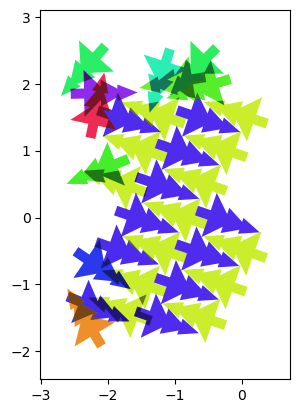

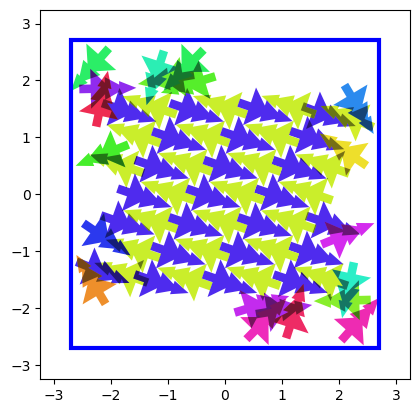

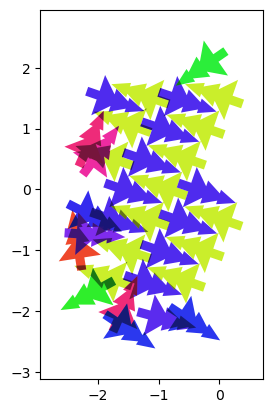

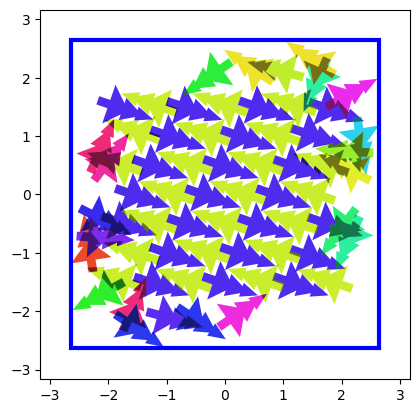

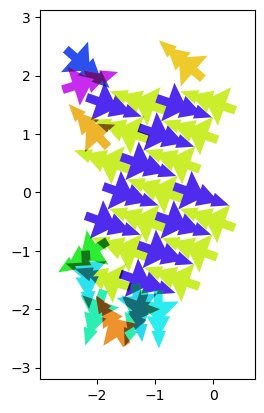

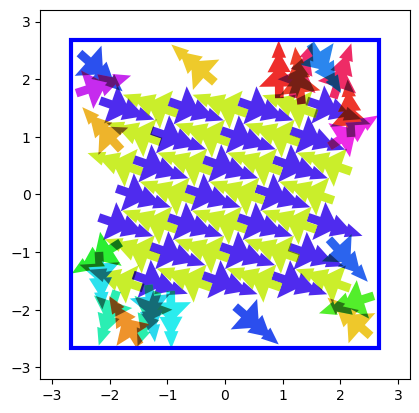

29515731 0.5 0.5
178554194 0.0 0.5
193625563 0.0 0.5
593016172 0.0 0.5
599544666 0.5 0.5
1012144340 0.0 0.5
739702163 0.5 0.5
464730593 0.0 0.5
818801356 0.5 0.5
1026841662 0.0 0.5
940899708 0.0 0.5
1050009197 0.5 0.5
882843661 0.0 0.5
514309467 0.0 0.5
986580295 0.0 0.5
725320288 0.5 0.5
Loading cached lookup table from /mnt/d//packing/temp//lut_cache/exact_sep_Nx900_Ny900_Nt900_trimTrue_tree42d0f17d.lut_cache...
Successfully loaded cached lookup table
Compiling CUDA LUT kernel one-time only)
Detected GPU compute capability: 89 (arch=sm_89)
Compiling: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -lineinfo -arch=sm_89 -cubin /mnt/d//packing/temp/pack_cuda_lut_saved.cu -o /mnt/d//packing/temp/pack_cuda_lut.cubin
/mnt/d//packing/temp/pack_cuda_lut_saved.cu:5: warning: "M_PI" redefined
    5 | #define M_PI 3.14159265358979323846f
      | 
In file included from /usr/include/c++/13/cmath:47,
                 from /usr/include/c

/mnt/d/packing/code/analysis/../core/pack_dynamics.py:61: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:93: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


init LAP CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling LAP kernels ===
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -cubin /mnt/d//packing/temp/lap_batch_saved.cu -o /mnt/d//packing/temp/lap_batch.cubin
ptxas info    : 0 bytes gmem
ptxas info    : Compiling entry function 'diversity_shortcut_kernel' for 'sm_89'
ptxas info    : Function properties for diversity_shortcut_kernel
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 1 barriers, 400 bytes cmem[0]
ptxas info    : Compile time = 9.904 ms
ptxas info    : Compiling entry function 'compute_costs' for 'sm_89'
ptxas info    : Function properties for compute_costs
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 29 registers, used 0 barriers, 384 bytes cmem[0]
ptxas info    : Compile time = 3.086 ms
ptxa

/mnt/d/packing/code/analysis/../core/pack_dynamics.py:61: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:93: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[0.37, 0.000131]]
Generation 1: Best costs = [[0.37, 3e-05]]
Generation 2: Best costs = [[0.369615, 2.2e-05]]
Generation 3: Best costs = [[0.368847, 5.9e-05]]
Generation 4: Best costs = [[0.368079, 6.1e-05]]
Generation 5: Best costs = [[0.367312, 5e-05]]
Generation 6: Best costs = [[0.366546, 5e-05]]
Generation 7: Best costs = [[0.36578, 5.2e-05]]
Generation 8: Best costs = [[0.365015, 5.1e-05]]
Generation 9: Best costs = [[0.364252, 4.5e-05]]
Generation 10: Best costs = [[0.363489, 4.6e-05]]
Generation 11: Best costs = [[0.362726, 4.6e-05]]
Generation 12: Best costs = [[0.361965, 4.9e-05]]
Generation 13: Best costs = [[0.361204, 4.7e-05]]
Generation 14: Best costs = [[0.360444, 4.1e-05]]
Generation 15: Best costs = [[0.359685, 4.4e-05]]
Generation 16: Best costs = [[0.358927, 4.1e-05]]
Generation 17: Best costs = [[0.35817, 4.8e-05]]
Generation 18: Best costs = [[0.357413, 4.1e-05]]
Generation 19: Best costs = [[0.356657, 3.3e-05]]
Generation 20: Best costs

KeyboardInterrupt: 

In [ ]:
#%%pyinstrument
#kgs.profiling=True
# %matplotlib widget
#kgs.enable_module_profiling(kgs)
import pack_ga3
import pack_runner
importlib.reload(pack_ga3)
fastMode = False
kgs.debugging_mode = 2

for seed in range(100):

    runner = pack_ga3.baseline_symmetry_180_tesselated(adapt_moves=True)

    #ref_sol = kgs.dill_load(kgs.temp_dir + '/controller_runs/done/ga_N68_seed507_done.pickle')
    #runner.ga.ga_base.initializer.ref_sol = kgs.create_tiled_solution('Perfect dimer', 15,make_symmetric=True, axis1_offset=0., axis2_offset=0.5)
    #runner.ga.ga_base.initializer.ref_sol.xyt[:,:,:2] += cp.array([0.2,0.2])
    # runner.ga.ga_base.initializer.ref_sol_crystal_type = 'Perfect dimer'
    # runner.ga.ga_base.initializer.ref_sol_axis1_offset = 0.
    runner.ga.ga_base.initializer.ref_sol_axis2_offset = 0.5
    # runner.ga.ga_base.initializer.new_tree_placer = True
    runner.ga.ga_base.initializer.base_solution.edge_spacer = kgs.EdgeSpacerBasic(dist_x = 0.5, dist_y = 0.5)
    # runner.ga.ga_base.initializer.base_solution.filter_move_locations_with_edge_spacer
    # runner.ga.ga_base.use_new_ref_score = True
    #runner.ga.ga_base.initializer.ref_rotate = None
    #runner.ga.ga_base.initializer.ref_sol.canonicalize()
    #runner.ga.ga_base.initializer.ref_N_scaling = 0.5
    runner.ga.target_score = 0.34

    runner.ga.ga_base.N_trees_to_do = 68
    runner.n_generations = 400
    #runner.ga.ga_base.reset_check_generations = 3
    runner.ga.N = 16
    #runner.ga.allow_reset_ratio = 1.
    runner.diagnostic_plot = False
    runner.seed = seed
    runner.plot_every = 10
    #runner.filter_before_rough = 1.

    runner_temp = copy.deepcopy(runner)
    runner_temp.ga.ga_base.initializer.fixed_h = cp.array([np.sqrt(0.37*runner_temp.ga.ga_base.N_trees_to_do),0,0],dtype=kgs.dtype_cp)
    import pack_vis_sol
    sol = runner_temp.ga.ga_base.initializer.initialize_population(10,runner_temp.ga.ga_base.N_trees_to_do)
    if seed==0:
        for i in range(3):
            pack_vis_sol.pack_vis_sol(sol.genotype, i)
            pack_vis_sol.pack_vis_sol(sol.phenotype, i)
    plt.pause(0.001)

    runner.run()
    

In [ ]:
#kgs.packings

In [ ]:
# import pack_vis_sol
# for i in range(sol.phenotype.N_solutions):
#     #_,ax=plt.subplots()
#     runner_temp.ga.ga_base.initializer.ref_sol = kgs.create_tiled_solution('Perfect dimer', 15,make_symmetric=True, axis1_offset=0.0, axis2_offset=0.5)
#     xx=copy.deepcopy(runner_temp.ga.ga_base.initializer.ref_sol)
#     #xx.xyt[:,:,1] *= -1
#     #xx.xyt[:,:,2] += np.pi
#     #xx.rotate(cp.array([np.pi/20]))
#     xx.canonicalize()
#     #xx.xyt[:,:,:2] += cp.array([0.2,0.2])
#     #pack_vis_sol.pack_vis_sol(xx, solution_idx=i,ax=ax,alpha=0.5)
#     _,ax=plt.subplots()
#     pack_vis_sol.pack_vis_sol(xx, solution_idx=i,ax=ax,alpha=0.5)
#     #_,ax=plt.subplots()
#     x = copy.deepcopy(ref_sol.ga.champions[0].genotype)
#     x.rotate(cp.array([np.pi/2]))
#     pack_vis_sol.pack_vis_sol(x, solution_idx=0,ax=ax,alpha=0.5)
    
    

In [ ]:
runner.run()